Task 1 (5 Marks): Load the datase

In [1]:
import pandas as pd

# TASK 1

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Define column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

# Load the dataset
data = pd.read_csv(url, names=column_names, skipinitialspace=True)


# print(data.head()) # print first five lines of data frame
print(data) # print the whole data frame (with limitations as dataset is too large).


       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

Task 2 (5 Marks): Take a quick look at the data structure (i.e., X) using .head(), .info(), .describe(), and .shape.

In [2]:
#  TASK 2
print("\nTASK 2\n")

# Display the first five rows
print("\n\nFirst few rows:")
print(data.head())

# DataFrame information
print("\nDataFrame Info:")
print(data.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Shape of the DataFrame
print("\nShape of the DataFrame:")
print(data.shape)


TASK 2



First few rows:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0

Task 2.1: Plot a histogram of the data.



TASK 2.1 Histogram: 
(a pop-up should appear)


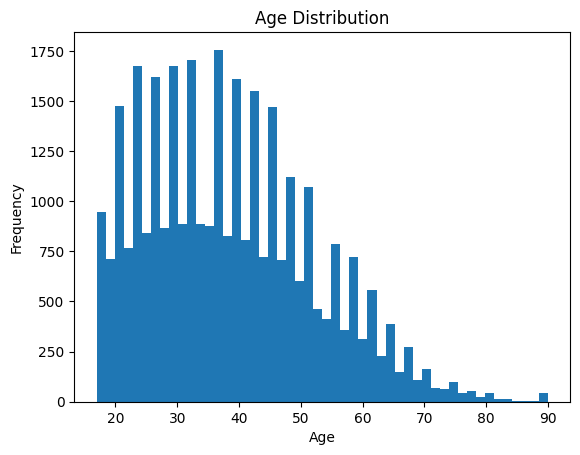

In [3]:
import matplotlib.pyplot as plt # Used to make a histogram for TASK 2.1 

# TASK 2.1
print("\n\nTASK 2.1 Histogram: \n(a pop-up should appear)")

data['age'].plot.hist(bins=50)  # Adjust the number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Task 3 (10 Marks): There are missing values in this dataset that are entered as a ? , check for and display the number of these missing values.

Task 3.1: Replace the ? character missing values you found in the previous step with null (nan), and run a .isna().sum() on your dataframe.

In [4]:
import numpy as np # Used to convert ? to NaN for TASK 3

# TASK 3
print("\nTASK 3\n")

# Convert '?' to NaN to make it easier to count missing values
data.replace('?', np.nan, inplace=True)

# Now we can count the number of NaN values in each column
missing_values_count = data.isna().sum()

# Display the number of missing values for each column
print(missing_values_count)



TASK 3

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


Task 4 (5 Marks): Check for duplicate rows, and remove them.

In [5]:
# TASK 4
print("\nTASK 4\n")

# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Remove duplicate rows
cleaned_data = data.drop_duplicates()
data = cleaned_data

# Print the number of duplicate rows found
print("Number of duplicate rows:", num_duplicate_rows)



TASK 4

Number of duplicate rows: 24


Task 5 (10 Marks): Create and apply a preprocessing pipeline to:
1. Fill in the missing numerical values with the mean using a SimpleImputer.
2. Scale the numerical columns using StandardScaler. Do not scale the target.
3. Fill in the missing categorical values with the most_frequent value using
SimpleImputer.
4. Encode the categorical columns using OneHotEncoder. Do not encode the target.
- Display your pipeline.
- Print your dataframe .shape.
Tip: Your dataframe.shape at this point should be (32537, 106).

In [6]:
## TASK 5
print("\nTASK 5\n")

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset (assuming 'data' has already been loaded with the correct columns)
# data = pd.read_csv(url, names=column_names, skipinitialspace=True)

# Handling the target column (assuming 'income' is the target)
target = 'income'

# Separating the features from the target
X = data.drop(columns=[target])
y = data[target]

# Identifying numerical and categorical columns (excluding the target column)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combining pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Applying the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data back into a DataFrame for easier handling
columns_transformed = preprocessor.get_feature_names_out()
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray(), columns=columns_transformed)

# Reattach the target column to meet the requirement of having 106 columns
X_preprocessed_with_target = pd.concat([X_preprocessed_df, y.reset_index(drop=True)], axis=1)

# Printing the pipeline for display
print(preprocessor)

# Print the dataframe's shape after preprocessing and including the target column
print('Dataframe shape after preprocessing and including the target column:', X_preprocessed_with_target.shape)



TASK 5

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])
Dataframe shape after preprocessing and including the target column: (32537, 106)


Task 6 (5 Marks): Print out the target value_counts(). Check if the target needs any kind
of data cleaning. For example, suppose your target has labels that look like <=50K. and <=50K, in
which case you will need to remove the . from the first value, and replace all the instances that
are <=50K. with <=50K .

In [7]:
# TASK 6
print("\nTASK 6\n")

# Print out initial value counts for the 'income' column to check for inconsistencies
print(data['income'].value_counts())

# Clean up inconsistencies in the 'income' column if necessary
data['income'] = data['income'].str.replace('.', '')

# Verify the cleanup by printing the value counts again
print(data['income'].value_counts())



TASK 6

income
<=50K    24698
>50K      7839
Name: count, dtype: int64
income
<=50K    24698
>50K      7839
Name: count, dtype: int64


Task 7 (10 Marks): Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.

Tip: Shapes should be (26029, 105) (26029,) (6508, 105) (6508,).

In [8]:
from sklearn.model_selection import train_test_split

# TASK 7
print("\nTASK 7\n")

# Assuming 'X_preprocessed_with_target' is the DataFrame after preprocessing which includes the target column
# First, we separate features and the target variable again
X_final = X_preprocessed_with_target.drop(columns=['income'])
y_final = X_preprocessed_with_target['income']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=42)

# Print the shapes of the train/test sets in one command
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



TASK 7

(26029, 105) (26029,) (6508, 105) (6508,)


Task 8 (25 Marks): Train a svm classifier (svc) to predict if the income of the adult exceeds 50K on the training set using: kernel = rbf, gamma = 1, and C =0.1.

Note due to the large training dataset size, this will take some time.

Task 8.1: Test your model on the X_Test, and report the classification_report on the
y_test and y_predict.

Task 8.2: Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

Task 8.3: Repeat Tasks 8.1 and 8.2 with C=1. Repeat both tasks again with C=10.

Compare and discuss the results. What was the effect of changing the value of C? Which C value will you choose for the final model and why? Answer this question in a markdown cell in your notebook.


TASK 8


Training with C = 0.1

Classification Report for C = 0.1:

              precision    recall  f1-score   support

       <=50K       0.77      0.99      0.87      4905
        >50K       0.79      0.10      0.18      1603

    accuracy                           0.77      6508
   macro avg       0.78      0.55      0.53      6508
weighted avg       0.78      0.77      0.70      6508

Confusion Matrix for C = 0.1:



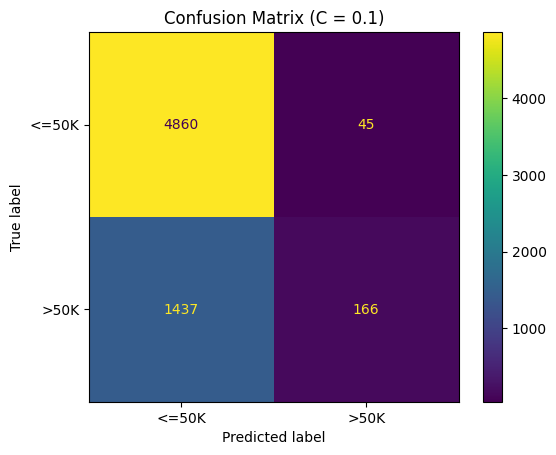


Training with C = 1

Classification Report for C = 1:

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      4905
        >50K       0.74      0.41      0.52      1603

    accuracy                           0.82      6508
   macro avg       0.78      0.68      0.71      6508
weighted avg       0.81      0.82      0.80      6508

Confusion Matrix for C = 1:



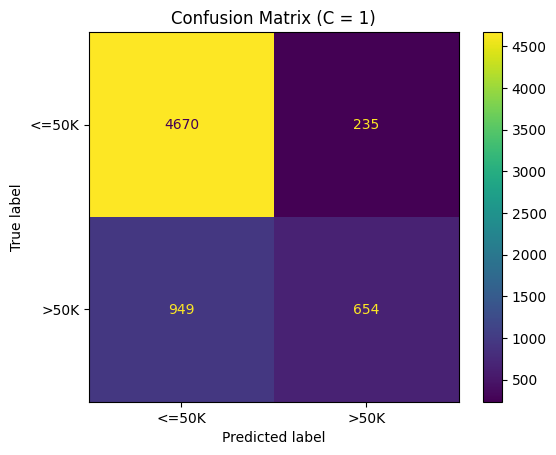


Training with C = 10

Classification Report for C = 10:

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      4905
        >50K       0.66      0.45      0.54      1603

    accuracy                           0.81      6508
   macro avg       0.75      0.69      0.71      6508
weighted avg       0.79      0.81      0.79      6508

Confusion Matrix for C = 10:



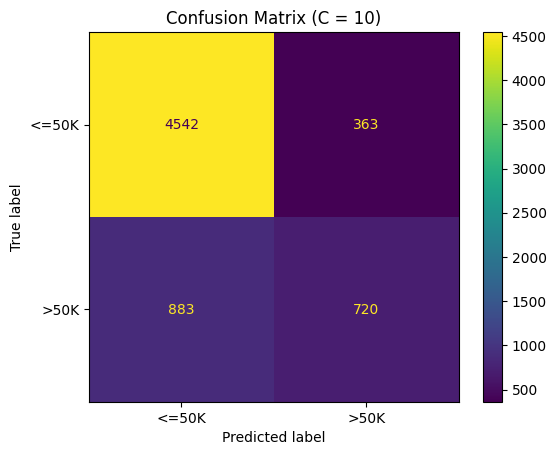

In [9]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#TASK 8
print("\nTASK 8\n")

# List of C values to iterate over
C_values = [0.1, 1, 10]

# Train, predict, and evaluate for each C value
for C in C_values:
    print(f"\nTraining with C = {C}\n")
    svm_clf = SVC(kernel='rbf', gamma=1, C=C)
    svm_clf.fit(X_train, y_train)
    
    # TASK 8.1: Test your model and report
    y_predict = svm_clf.predict(X_test)
    print(f"Classification Report for C = {C}:\n")
    print(classification_report(y_test, y_predict))
    
    # TASK 8.2: Plot the confusion matrix
    print(f"Confusion Matrix for C = {C}:\n")
    ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
    plt.title(f'Confusion Matrix (C = {C})')
    plt.show()


Here I used a for loop to change the value of C from 0.1 to 1 to 10.

The effect of changing the value of C...